In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data.csv')
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [4]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                3904 non-null   datetime64[ns]
 1   sp500 open          3719 non-null   float64       
 2   sp500 high          3719 non-null   float64       
 3   sp500 low           3719 non-null   float64       
 4   sp500 close         3719 non-null   float64       
 5   sp500 volume        3719 non-null   float64       
 6   sp500 high-low      3719 non-null   float64       
 7   nasdaq open         3719 non-null   float64       
 8   nasdaq high         3719 non-null   float64       
 9   nasdaq low          3719 non-null   float64       
 10  nasdaq close        3719 non-null   float64       
 11  nasdaq volume       3719 non-null   float64       
 12  nasdaq high-low     3719 non-null   float64       
 13  us_rates_%          176 non-null    float64     

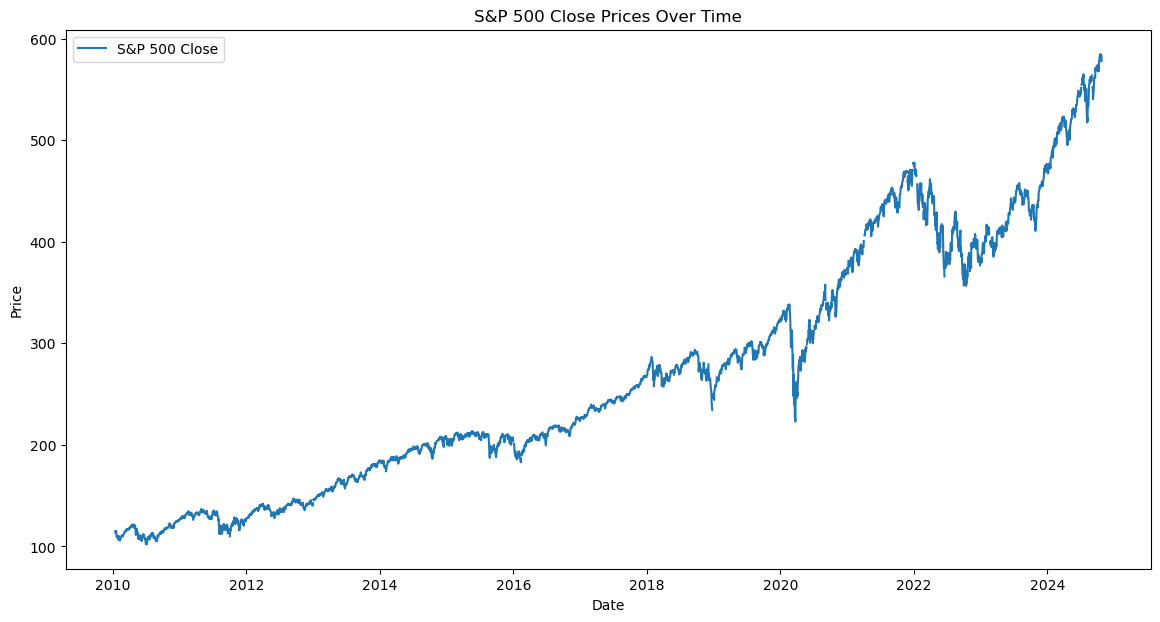

In [7]:
# Plotting S&P 500 close prices over time
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['sp500 close'], label='S&P 500 Close')
plt.title('S&P 500 Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig("S&P 500 Close Prices Over Time.png")
plt.show()

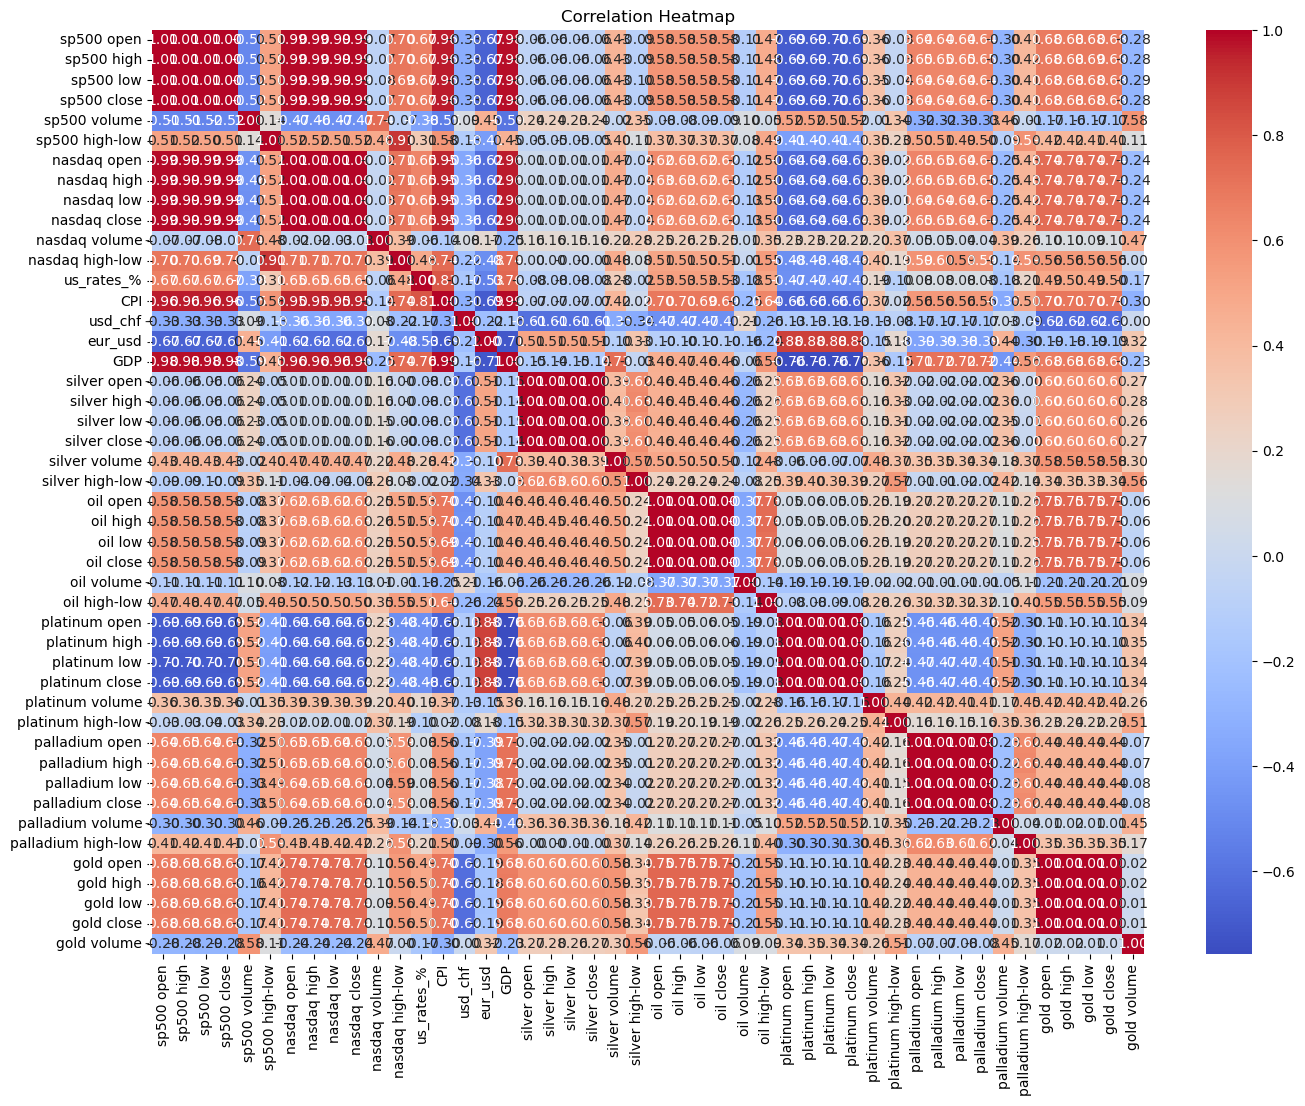

In [8]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig("Correlation Heatmap.png")
plt.show()

In [9]:
features = ['sp500 open', 'sp500 high', 'sp500 low', 'sp500 volume', 'us_rates_%', 'CPI', 'usd_chf', 'eur_usd', 'GDP']
X = df[features]
y = df['sp500 close']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(1.1037177161949954, 0.9999215881444208)